# Sentiment Analysis using - RNN model

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.optimizers import Adam

In [2]:
# File path to JSON dataset
file_path = r'C:\Users\Administrator\Documents\GitHub\Datasets\yelp_academic_dataset_review.json'

In [3]:
# Load data in chunks
chunk_size = 1000000
model_save_path = 'sentiment_analysis_rnn_model.h5'

In [4]:
# Initialize the model outside the loop
model = None
epochs = 10
num_classes = 3

In [5]:
# Load the data in chunks
for chunk in pd.read_json(file_path, lines=True, chunksize=chunk_size):
    print(chunk)

    # Accessing the data DataFrame
    texts = chunk['text'].tolist()
    labels = pd.cut(chunk['stars'], bins=[0, 2, 3, 5], labels=[1, 2, 3])

    # Tokenize the text
    tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
    tokenizer.fit_on_texts(texts)
    sequences = tokenizer.texts_to_sequences(texts)

    # Padding sequences
    max_len = 100
    padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

    # Convert labels to numerical format
    numeric_labels = np.array(labels)

    # Convert to one-hot encoding for multi-class classification
    labels_one_hot = pd.get_dummies(labels).values

    # Split the dataset into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(padded_sequences, labels_one_hot, test_size=0.2, random_state=42)

    # Build or load the RNN model
    if model is None or not os.path.exists(model_save_path):
        embedding_dim = 50

        model = Sequential()
        model.add(Embedding(input_dim=10000, output_dim=embedding_dim, input_length=max_len))
        model.add(LSTM(100))
        model.add(Dense(num_classes, activation='softmax'))  # Multi-class classification
        model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])  # Categorical crossentropy loss

    # Train the model and store the history
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=128, validation_split=0.1, verbose=1)

    # Display the current epoch and metrics
    print(f"Epoch {epochs} - Loss: {history.history['loss'][-1]}, Accuracy: {history.history['accuracy'][-1]}, Validation Loss: {history.history['val_loss'][-1]}, Validation Accuracy: {history.history['val_accuracy'][-1]}")

                     review_id                 user_id  \
0       KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA   
1       BiTunyQ73aT9WBnpR9DZGw  OyoGAe7OKpv6SyGZT5g77Q   
2       saUsX_uimxRlCVr67Z4Jig  8g_iMtfSiwikVnbP2etR0A   
3       AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ   
4       Sx8TMOWLNuJBWer-0pcmoA  bcjbaE6dDog4jkNY91ncLQ   
...                        ...                     ...   
999995  t-2o35kr7Q9DSaeuKhaDuQ  oX7o1TH0PHUWp9r9ry9_vw   
999996  fLIwWCvdul9PNWYfJt5QWA  v8wlapFKVLs2qTYCGhCdiw   
999997  ETAiy6wEM-r9ve4SKDhBpg  rLlYc1RzIBnOmnX3AbpEYw   
999998  8OgvSXuc6KjAt2fSz9LuzA  eEH-8CEPU5ndPxDGzVfHiQ   
999999  TQoVzNXqDkiDXgzlw8cyaQ  HYmGwYXvcYmW7dDjuWKJfw   

                   business_id  stars  useful  funny  cool  \
0       XQfwVwDr-v0ZS3_CbbE5Xw      3       0      0     0   
1       7ATYjTIgM3jUlt4UM3IypQ      5       1      0     1   
2       YjUWPpI6HXG530lwP-fb2A      3       0      0     0   
3       kxX2SOes4o-D3ZQBkiMRfA      5       1      0   

Epoch 1/10
5625/5625 [==============================] - 146s 26ms/step - loss: 0.3942 - accuracy: 0.8508 - val_loss: 0.3508 - val_accuracy: 0.8687
Epoch 2/10
5625/5625 [==============================] - 144s 26ms/step - loss: 0.3228 - accuracy: 0.8759 - val_loss: 0.3231 - val_accuracy: 0.8762
Epoch 3/10
5625/5625 [==============================] - 144s 26ms/step - loss: 0.2980 - accuracy: 0.8849 - val_loss: 0.3142 - val_accuracy: 0.8778
Epoch 4/10
5625/5625 [==============================] - 144s 26ms/step - loss: 0.2797 - accuracy: 0.8914 - val_loss: 0.3167 - val_accuracy: 0.8791
Epoch 5/10
5625/5625 [==============================] - 145s 26ms/step - loss: 0.2629 - accuracy: 0.8979 - val_loss: 0.3157 - val_accuracy: 0.8795
Epoch 6/10
5625/5625 [==============================] - 146s 26ms/step - loss: 0.2469 - accuracy: 0.9037 - val_loss: 0.3307 - val_accuracy: 0.8770
Epoch 7/10
5625/5625 [==============================] - 146s 26ms/step - loss: 0.2311 - accuracy: 0.9100 - val_loss: 0

5625/5625 [==============================] - 146s 26ms/step - loss: 0.3857 - accuracy: 0.8554 - val_loss: 0.3359 - val_accuracy: 0.8733
Epoch 2/10
5625/5625 [==============================] - 144s 26ms/step - loss: 0.3152 - accuracy: 0.8794 - val_loss: 0.3058 - val_accuracy: 0.8816
Epoch 3/10
5625/5625 [==============================] - 145s 26ms/step - loss: 0.2896 - accuracy: 0.8884 - val_loss: 0.3027 - val_accuracy: 0.8856
Epoch 4/10
5625/5625 [==============================] - 145s 26ms/step - loss: 0.2711 - accuracy: 0.8950 - val_loss: 0.3022 - val_accuracy: 0.8839
Epoch 5/10
5625/5625 [==============================] - 146s 26ms/step - loss: 0.2546 - accuracy: 0.9014 - val_loss: 0.3044 - val_accuracy: 0.8858
Epoch 6/10
5625/5625 [==============================] - 146s 26ms/step - loss: 0.2388 - accuracy: 0.9073 - val_loss: 0.3120 - val_accuracy: 0.8806
Epoch 7/10
5625/5625 [==============================] - 146s 26ms/step - loss: 0.2230 - accuracy: 0.9136 - val_loss: 0.3318 - val

5571/5571 [==============================] - 190s 34ms/step - loss: 0.3755 - accuracy: 0.8595 - val_loss: 0.3273 - val_accuracy: 0.8732
Epoch 2/10
5571/5571 [==============================] - 152s 27ms/step - loss: 0.3065 - accuracy: 0.8839 - val_loss: 0.3064 - val_accuracy: 0.8819
Epoch 3/10
5571/5571 [==============================] - 162s 29ms/step - loss: 0.2821 - accuracy: 0.8920 - val_loss: 0.2950 - val_accuracy: 0.8874
Epoch 4/10
5571/5571 [==============================] - 165s 30ms/step - loss: 0.2637 - accuracy: 0.8989 - val_loss: 0.2991 - val_accuracy: 0.8880
Epoch 5/10
5571/5571 [==============================] - 186s 33ms/step - loss: 0.2475 - accuracy: 0.9047 - val_loss: 0.3058 - val_accuracy: 0.8871
Epoch 6/10
5571/5571 [==============================] - 163s 29ms/step - loss: 0.2315 - accuracy: 0.9109 - val_loss: 0.3076 - val_accuracy: 0.8871
Epoch 7/10
5571/5571 [==============================] - 133s 24ms/step - loss: 0.2163 - accuracy: 0.9169 - val_loss: 0.3238 - val

In [6]:
# Use only the final loop's history for plotting
final_history = history.history

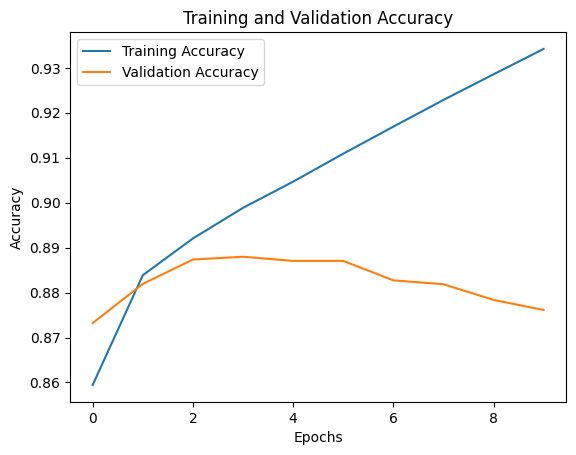

In [7]:
# Plot training and validation accuracy
plt.plot(final_history['accuracy'], label='Training Accuracy')
plt.plot(final_history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

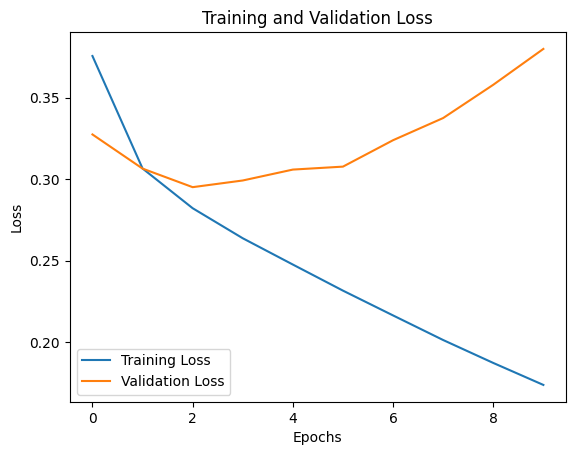

In [8]:
# Plot training and validation loss
plt.plot(final_history['loss'], label='Training Loss')
plt.plot(final_history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [9]:
# Evaluate the model on the test data
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

6190/6190 [==============================] - 29s 5ms/step


In [10]:
# Print classification report
print(classification_report(y_true_classes, y_pred_classes))


              precision    recall  f1-score   support

           0       0.84      0.87      0.86     47967
           1       0.48      0.39      0.43     18414
           2       0.93      0.94      0.94    131675

    accuracy                           0.88    198056
   macro avg       0.75      0.74      0.74    198056
weighted avg       0.87      0.88      0.87    198056



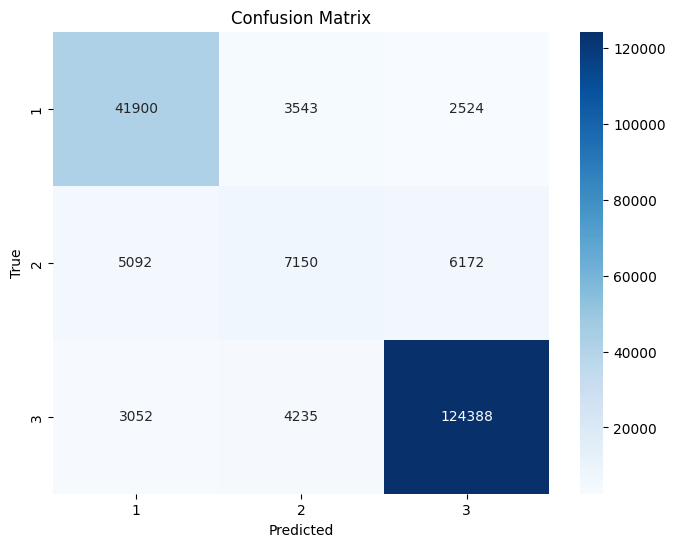

In [11]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['1', '2', '3'], yticklabels=['1', '2', '3'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [12]:
# Save the model
model.save("RNN_model_final.h5")